# Homework 2 (KNN)

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart health:

- age           : The person's age in years
- sex           : The person's sex (1 = male, 0 = female)
- cp            : The chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trtbps        : The person's resting blood pressure (mm Hg on admission to the hospital)
- chol          : The person's cholesterol measurement in mg/dl
- fbs           : The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg       : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- hr            : The person's maximum heart rate achieved
- exng          : Exercise induced angina (1 = yes; 0 = no)
- oldpeak       : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope         : the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- vessels       : The number of major vessels (0 - 4)
- thal          : A blood disorder called thalassemia (0 = normal, 1 = fixed defect, 2 = reversable defect, 3 = unreversable defect)
- heart_disease : Heart disease (0 = no, 1 = yes)


Many of the features come from Electrocardiogram Tests (ECG/EKG), where the electrical rhythms of the heart are measured. Here's an example of an ECG reading:


![ECG Example](ecg.jpg)



### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict whether an incoming patient is likely to have heart disease or not

In this assignment, we will be using K-nearest-neighbors as the classifier

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW2.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [2]:
ecg_df = pd.read_csv('data_hw2.csv')
ecg_df.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
############################################## DATA EXPLORATION ###############################################################

### Part 1: Visual Analysis

__Q1:__ How many patients are there?

In [4]:
#General information about the data set
ecg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   bp             303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   hr             303 non-null    int64  
 8   exng           303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  vessels        303 non-null    int64  
 12  thall          303 non-null    int64  
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- There are a total of 303 patients.

First, we want to get our data ready for analysis.

__Q2:__ The categorical variables in the data set are already encoded, but which features would be considered categorical? (I counted 9, including the dependent variable)

- They are: sex, cp, fbs, restecg, exng, slope, vessels, thal, and heart_disease.

__Q3:__ How might categorical variables affect a KNN classifier?

- Since KNN classifier is classifying objects based on the distance metrics (Ecludian, Manhattan, etc), having categorical variables will make it difficult to utilize the KNN classifier since the difference between categorical cannot be measured with the distance metrics without prior-transformation.

Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Once again, look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function to make it readable. Remember, we want the colors to immediately pop out and tell us what's happening without having to read the numbers. It's much easier to see color differences than read a table of numbers. The job of a data scientist is to make data understandable.

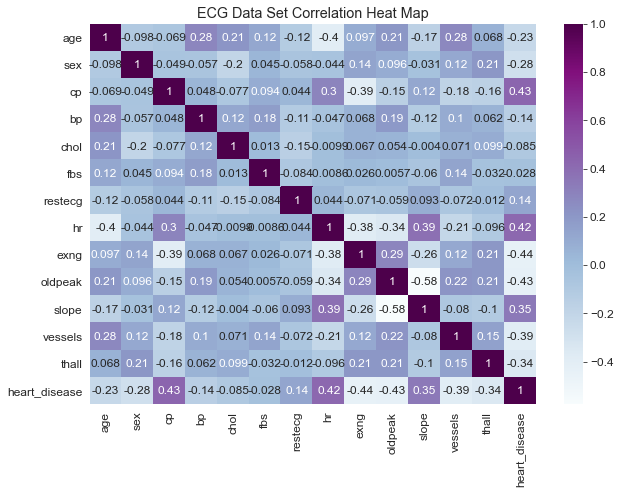

In [5]:
sns.color_palette("tab10")
sns.heatmap(ecg_df.corr(), annot = True, cmap="BuPu")
plt.title('ECG Data Set Correlation Heat Map')
plt.show()

__Q4:__ What sticks out from the heatmap, and what does it tell us about our data, especially heart disease?

- The highest value of correlation is 0.39 between independent variables which is in the acceptable range. In reagards to heat_disease, cp, hr, and slope seems to have the highest possitive correlation while exng, ddpeak, and vessels seem to have the highest negative correlation. These 6 attributes will like be the best variables for predicting heart_disease.

__Q5:__ Do you think this correlation matrix is affected at all by the fact that heart_disease is a categorical variable?

More on [understanding correlation](https://www.mathsisfun.com/data/correlation.html)

- Yes, since the correlation is calculated based on the assumption that the variables are all continuous and normally distributed, having a categorical variable as a dependent variable will negative affect the value of the correlation matrix.

We have mostly categorical variables in this data set, and on top of that, we are not medical experts, so the exact definition of some features may not be obvious to us. How can we better understand the data like this?

With something like this, I like using [Seaborn violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html), because they are very intuitive.

In my correlation plot, there were 4 variables that had > +/- 0.40 correlation with heart_disease:
- cp
- hr
- exng
- oldpeak

So, let's look at those. Try using a violin plot to create the following images. The features are labeled on the x and y axis. As a tip, make sure the following are included in your function call,

```hue = 'heart_disease'```

```split = True```

Check out the above link to see the documentation for violin plots if you have any questions, or use Google :)

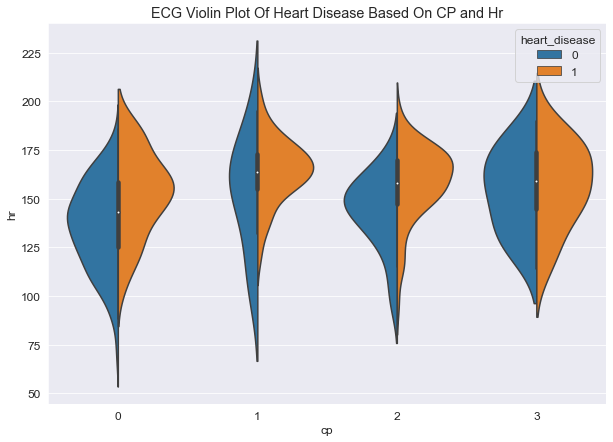

In [6]:
sns.violinplot(data = ecg_df, x = 'cp', y = 'hr', hue = 'heart_disease', split = True)
plt.title('ECG Violin Plot Of Heart Disease Based On CP and Hr')
plt.show()

__Q6:__ What can we learn from the above plot about the relations between the 3 features?

- First, hearth disease is especially prevalance within the 125 to 200 hours range across all type of cp. Unfortunately, the different type of cp do not seem to indicate a higher chance of having heart disease since the amount of people having no heart disease is roughly the same on the opposite side. There is 1 case at cp = 1 where the difference between patients having heart disease and no heart disease is more significant around the 150 to 175 hours range.

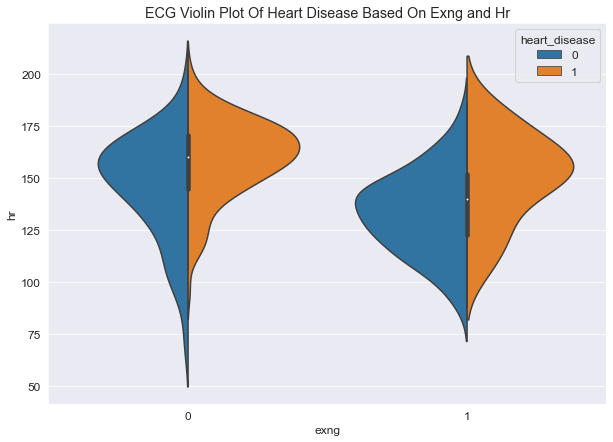

In [7]:
sns.violinplot(data = ecg_df, x = 'exng', y = 'hr', hue = 'heart_disease', split = True)
plt.title('ECG Violin Plot Of Heart Disease Based On Exng and Hr')
plt.show()

__Q7:__ What can we learn from the above plot about the relations between the 3 features?

- Similar to the previous violin graph between cp and hr. The majority of patient having heart disease is between the 125 to 200 hours range. The different between two type of exng do not seem to clearly indicate a patient having heart disease. The most noteworthy visual indicator is the peak of people having heart disease with exng type 1 is around 165 hours while the peak of people not having heart disease with exng type 1 is 130.

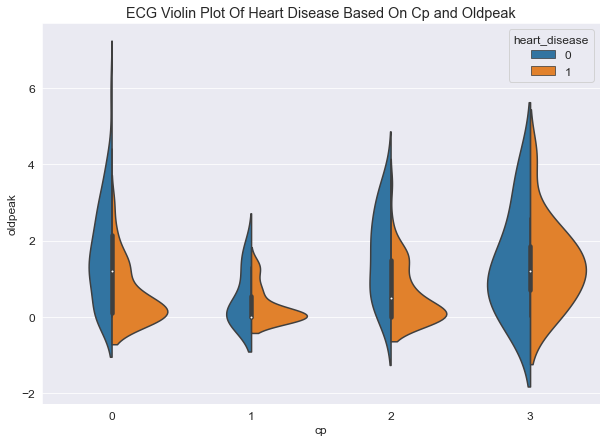

In [8]:
sns.violinplot(data = ecg_df, x = 'cp', y = 'oldpeak', hue = 'heart_disease', split = True)
plt.title('ECG Violin Plot Of Heart Disease Based On Cp and Oldpeak')
plt.show()

__Q8:__ What can we learn from the above plot about the relations between the 3 features?

- In the violin graph between cp and oldpeak, we can see a clear difference between the patients with heart disease and no heart disease within cp type 0, 1, and 2 at oldpeak ~= 0.3. We don't see the same difference in cp type 3. Thus, having cp = type 0, 1, and 2 with oldpeak ~= 0.3 have a high correlation with patients having heart diseases.

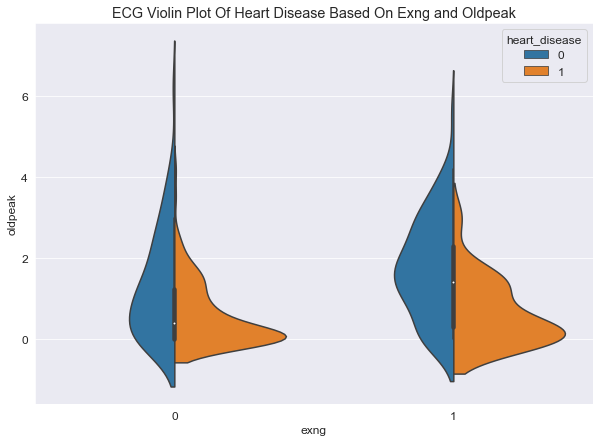

In [9]:
sns.violinplot(data = ecg_df, x = 'exng', y = 'oldpeak', hue = 'heart_disease', split = True)
plt.title('ECG Violin Plot Of Heart Disease Based On Exng and Oldpeak')
plt.show()

__Q9:__ What can we learn from the above plot about the relations between the 3 features?

- Similar to the previous violin graph between cp and oldpeak, exng and oldpeak violin graph also shows a clear distinction between the patients having heart disease and not having heart disease. Specifically, the focus of the patients having heart disease can be either exng type 0 and 1 with oldpeak ~= 0.3. 

As we can see, using violin plots is a unique and cool way to visualize and help us to comprehend how different features are interacting with one another in our data set. There are many other ways to do it, but being able to understand the data set you have is a really important part of any data science project. Visual representations are also super helpful for our brains to help us intuitively understand the data.

### Part 2: KNN Analysis

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, HW1, the lecture notes, or the just google the specific function to see how to use it.

First, let's split and then scale the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [10]:
######################################## DATA PROCESSING #################################################################

In [11]:
X = ecg_df.drop(['heart_disease'], axis = 1)
y = ecg_df['heart_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 129)
X_train.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2


__Q10:__ What test_size did you decide to use?

- I decided to use test_size = 0.2 with a random_state = 129.

Now, we want to actually run the KNN analysis. Using KNeighborsClassifier and a for loop, run KNN using different values of k, from 2 -> 25. Print them out as they are run.

Make sure to save the accuracies in a list or array, as they will be used later.

In [12]:
test_scores_default = []
train_scores = []

for i in range (2, 25):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores_default.append(knn.score(X_test, y_test))
    print("k = " + str(i) + "   Accuracy = " + str(knn.score(X_train, y_train)))

k = 2   Accuracy = 0.8140495867768595
k = 3   Accuracy = 0.8099173553719008
k = 4   Accuracy = 0.7727272727272727
k = 5   Accuracy = 0.78099173553719
k = 6   Accuracy = 0.7768595041322314
k = 7   Accuracy = 0.7396694214876033
k = 8   Accuracy = 0.7520661157024794
k = 9   Accuracy = 0.731404958677686
k = 10   Accuracy = 0.71900826446281
k = 11   Accuracy = 0.7272727272727273
k = 12   Accuracy = 0.7066115702479339
k = 13   Accuracy = 0.71900826446281
k = 14   Accuracy = 0.7107438016528925
k = 15   Accuracy = 0.7107438016528925
k = 16   Accuracy = 0.7148760330578512
k = 17   Accuracy = 0.7107438016528925
k = 18   Accuracy = 0.6983471074380165
k = 19   Accuracy = 0.6818181818181818
k = 20   Accuracy = 0.7024793388429752
k = 21   Accuracy = 0.6983471074380165
k = 22   Accuracy = 0.6942148760330579
k = 23   Accuracy = 0.6983471074380165
k = 24   Accuracy = 0.7024793388429752


Now, do the same thing as above, but try using a different distance function (try 'cosine') as part of the KNearestNeighbors function.

In [13]:
test_scores_cosine = []
train_scores = []

for i in range (2, 25):
    knn = KNeighborsClassifier(i, metric = 'cosine')
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores_cosine.append(knn.score(X_test, y_test))
    print("k = " + str(i) + "   Accuracy = " + str(knn.score(X_train, y_train)))

k = 2   Accuracy = 0.8099173553719008
k = 3   Accuracy = 0.768595041322314
k = 4   Accuracy = 0.7107438016528925
k = 5   Accuracy = 0.7520661157024794
k = 6   Accuracy = 0.7479338842975206
k = 7   Accuracy = 0.7603305785123967
k = 8   Accuracy = 0.756198347107438
k = 9   Accuracy = 0.7479338842975206
k = 10   Accuracy = 0.7107438016528925
k = 11   Accuracy = 0.7355371900826446
k = 12   Accuracy = 0.7148760330578512
k = 13   Accuracy = 0.7272727272727273
k = 14   Accuracy = 0.7231404958677686
k = 15   Accuracy = 0.71900826446281
k = 16   Accuracy = 0.71900826446281
k = 17   Accuracy = 0.7231404958677686
k = 18   Accuracy = 0.71900826446281
k = 19   Accuracy = 0.7148760330578512
k = 20   Accuracy = 0.7148760330578512
k = 21   Accuracy = 0.7148760330578512
k = 22   Accuracy = 0.7107438016528925
k = 23   Accuracy = 0.7148760330578512
k = 24   Accuracy = 0.7231404958677686


Finally, choose your own distance function from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics). Make sure to save these accuracies as well

In [14]:
test_scores_manhattan = []
train_scores = []

for i in range (2, 25):
    knn = KNeighborsClassifier(i, metric = 'manhattan')
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores_manhattan.append(knn.score(X_test, y_test))
    print("k = " + str(i) + "   Accuracy = " + str(knn.score(X_train, y_train)))

k = 2   Accuracy = 0.8388429752066116
k = 3   Accuracy = 0.8305785123966942
k = 4   Accuracy = 0.7851239669421488
k = 5   Accuracy = 0.7975206611570248
k = 6   Accuracy = 0.8057851239669421
k = 7   Accuracy = 0.7975206611570248
k = 8   Accuracy = 0.7727272727272727
k = 9   Accuracy = 0.768595041322314
k = 10   Accuracy = 0.756198347107438
k = 11   Accuracy = 0.7520661157024794
k = 12   Accuracy = 0.743801652892562
k = 13   Accuracy = 0.7644628099173554
k = 14   Accuracy = 0.756198347107438
k = 15   Accuracy = 0.7355371900826446
k = 16   Accuracy = 0.731404958677686
k = 17   Accuracy = 0.7355371900826446
k = 18   Accuracy = 0.7396694214876033
k = 19   Accuracy = 0.7231404958677686
k = 20   Accuracy = 0.7231404958677686
k = 21   Accuracy = 0.7231404958677686
k = 22   Accuracy = 0.7272727272727273
k = 23   Accuracy = 0.7231404958677686
k = 24   Accuracy = 0.7231404958677686


Now, plot the three different accuracies using SeaBorn lineplots on a single graph/ax. The first line has been added to help you begin. Not all the details have to be shown as the one below, but the graph should still make sense and be readable. You also might use a different distance metric for the 2nd and 3rd models, so it's okay if that's different.

If you want to learn more about how Seaborn/Matplotlib graphs work, check out the documentation.

In [15]:
####################################### MODELS EVALUATION ###################################################################

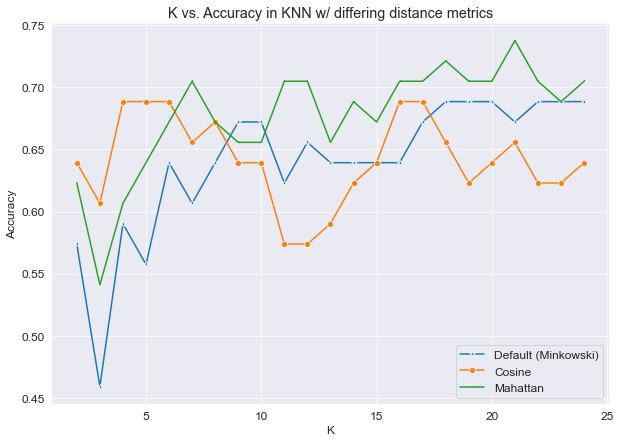

In [16]:
sns.lineplot(x=range(2,25), y=test_scores_default, marker='*', label='Default (Minkowski)')
sns.lineplot(x=range(2,25), y=test_scores_cosine, marker='o', label='Cosine')
sns.lineplot(x=range(2,25), y=test_scores_manhattan, marker=',', label='Mahattan')
plt.title('K vs. Accuracy in KNN w/ differing distance metrics')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

__Q11:__ Which distance function worked best for you? What do you think the benefit of using different distance functions might be? 

- For my KNN models, the KNN model using the Manhattan distance metric performed the best at just slightly below 75% accuracy. Choosing the distance function is crucial in KNN model because it determines how similarity between observations is measured. Thus, it determines the final prediction of the model and the accuracy rating of the mode.

Do any another analysis you see fit or are curious about. Extra work is often rewarded with bonus points!

In [17]:
######################################### IMPROVING THE MODEL ###############################################################

In [18]:
X = ecg_df.drop(['heart_disease', 'age', 'sex', 'bp', 'chol', 'fbs', 'restecg'], axis = 1)
y = ecg_df['heart_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 129)
X_train.head()

,cp,hr,exng,oldpeak,slope,vessels,thall
2,1,172,0,1.4,2,0,2
153,2,152,0,0.0,1,1,2
159,1,163,0,0.0,2,0,3
37,2,165,0,1.6,2,0,3
30,1,168,0,0.0,2,1,2


In [19]:
test_scores_updated = []
train_scores = []

for i in range (2, 50):
    knn = KNeighborsClassifier(i, metric = 'manhattan')
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores_updated.append(knn.score(X_test, y_test))
    print("k = " + str(i) + "   Accuracy = " + str(knn.score(X_train, y_train)))

k = 2   Accuracy = 0.8966942148760331
k = 3   Accuracy = 0.8842975206611571
k = 4   Accuracy = 0.871900826446281
k = 5   Accuracy = 0.871900826446281
k = 6   Accuracy = 0.8429752066115702
k = 7   Accuracy = 0.8264462809917356
k = 8   Accuracy = 0.8305785123966942
k = 9   Accuracy = 0.8099173553719008
k = 10   Accuracy = 0.7975206611570248
k = 11   Accuracy = 0.7768595041322314
k = 12   Accuracy = 0.78099173553719
k = 13   Accuracy = 0.7520661157024794
k = 14   Accuracy = 0.7603305785123967
k = 15   Accuracy = 0.7479338842975206
k = 16   Accuracy = 0.743801652892562
k = 17   Accuracy = 0.7479338842975206
k = 18   Accuracy = 0.7396694214876033
k = 19   Accuracy = 0.743801652892562
k = 20   Accuracy = 0.743801652892562
k = 21   Accuracy = 0.7479338842975206
k = 22   Accuracy = 0.7479338842975206
k = 23   Accuracy = 0.7479338842975206
k = 24   Accuracy = 0.743801652892562
k = 25   Accuracy = 0.743801652892562
k = 26   Accuracy = 0.743801652892562
k = 27   Accuracy = 0.7355371900826446
k = 

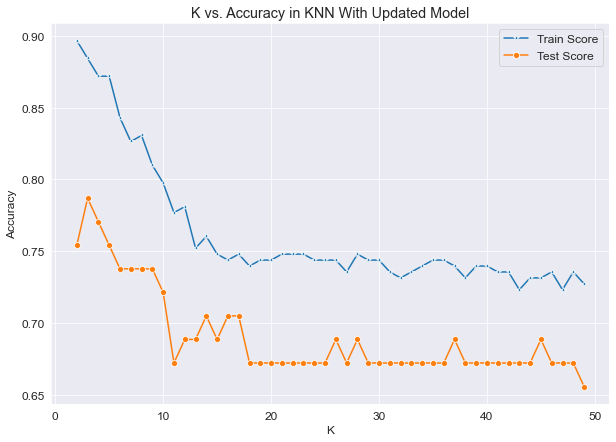

In [20]:
sns.lineplot(x=range(2,50), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(2,50), y=test_scores_updated, marker='o', label='Test Score')
plt.title('K vs. Accuracy in KNN With Updated Model')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

_type answer here_

The above analysis looks at 303 patients with and without heart disease. Each patient has eight attributes: age, sex, cp, trtbps, chol, fbs, restecg, hr, exng, oldpeak, slope, vessels, and thal. The goal of the analysis is to utilize some, if not all, attributes to build a KNN model that can accurately predict whether a new patient would have heart disease. 

A first look at the dataset shows nine categorical variables, including the target variable with no null value. These categorical variables will negatively impact the performance of the KNN model if not transformed. However, for the purpose of the analysis, we will continue using the categorical variables. Based on the correlation heat map, there is no outstanding high correlation between the independent variables. On the other hand, cp, hr, and slop have the highest positive correlation with heart disease, while exng, ddpeak, and vessels have the highest negative correlation with heart disease. 

Based on the correlation heat map, we train 66 KNN models from K = 2 to K = 24 between three distance metrics: Minkowski, cosine, and manhattan. The final results show that the best-performing model is the manhattan model at K = 21 and accuracy = 0.74. Thus, the manhattan model seems to perform the best out of the three distance metrics. A more in-depth look at the manhattan model with only the six attributes with the highest positive/negative correlation with heart disease gives a new model that can achieve an accuracy score of 0.78 at K = 2. However, we are not utilizing all the given parameters, so depending on the situation, this model can perform worst than the previous model. Regardless, the highest performing KNN model we can achieve is 0.78 at K = 2 using only six attributes with the manhattan distance metrics.